<a href="https://colab.research.google.com/github/SantiM01/Senior-Project/blob/main/Model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# File paths
file_paths = {
    "Linear Regression": "qb_results_with predictions_linear_regression.csv",
    "Random Forest": "qb_results_with_predictions_random_forrest.csv",
    "Dummy Model": "qb_dummy_model_results.csv",
}

# Load the data into dictionaries
dataframes = {model: pd.read_csv(path) for model, path in file_paths.items()}

# Display the first few rows of each file to understand their structure
data_preview = {model: df.head() for model, df in dataframes.items()}
data_preview


{'Linear Regression':    QB ID        MAE          MSE  R² Score  Predicted Rush Attempts
 0    865   0.693504     0.686309  0.901392                10.308569
 1   3739   2.381436     9.939942  0.321042                17.204187
 2   4161   6.034821    51.766021 -0.593291                16.321789
 3  20245  29.509982  1260.318009  0.115783                63.744123
 4  20531   7.541148    91.540172 -0.090077                26.388070,
 'Random Forest':    QB ID        MAE          MSE  R² Score  Predicted Rush Attempts
 0    865   1.772699     5.571787  0.199456                 8.940197
 1   3739   4.949113    25.259151 -0.725352                17.901539
 2   4161   6.217844    48.628586 -0.496725                17.816530
 3  20245  31.023874  1202.526489  0.156328                38.563530
 4  20531   8.016624   102.074707 -0.215525                28.444370,
 'Dummy Model':    QB ID  Mean Absolute Error  Predicted Rush Attempts
 0    865             8.913043                        0
 1   

In [52]:
import pandas as pd

# Assuming you've already loaded your dataframes as shown previously

# Calculate the mean MAE for each model
# Changed 'MAE' to 'Mean Absolute Error' for the Dummy Model
mean_mae = {
    model: df["MAE"].mean() if model != "Dummy Model" else df["Mean Absolute Error"].mean()
    for model, df in dataframes.items()
}

# Display the mean MAE for each model
mean_mae

{'Linear Regression': np.float64(10.438188944817576),
 'Random Forest': np.float64(10.053728418455094),
 'Dummy Model': np.float64(15.991555140554752)}

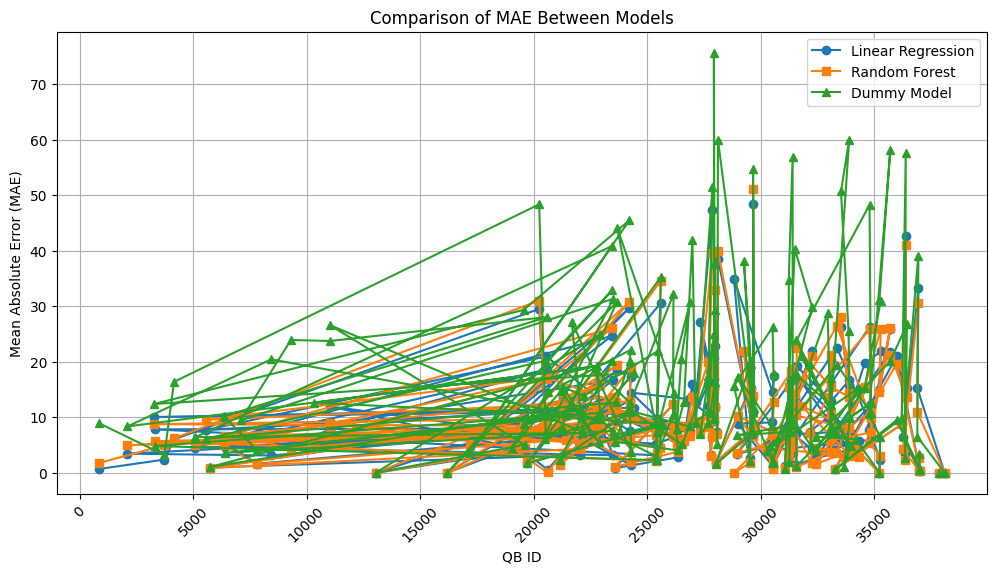

In [3]:
import matplotlib.pyplot as plt

# Extract QB IDs and MAE values
mae_data = pd.DataFrame({
    "QB ID": dataframes["Linear Regression"]["QB ID"],
    "Linear Regression": dataframes["Linear Regression"]["MAE"],
    "Random Forest": dataframes["Random Forest"]["MAE"],
    "Dummy Model": dataframes["Dummy Model"]["Mean Absolute Error"],
})

# Plot the MAE values for each model
plt.figure(figsize=(12, 6))
plt.plot(mae_data["QB ID"], mae_data["Linear Regression"], label="Linear Regression", marker='o', linestyle='-')
plt.plot(mae_data["QB ID"], mae_data["Random Forest"], label="Random Forest", marker='s', linestyle='-')
plt.plot(mae_data["QB ID"], mae_data["Dummy Model"], label="Dummy Model", marker='^', linestyle='-')

plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Between Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


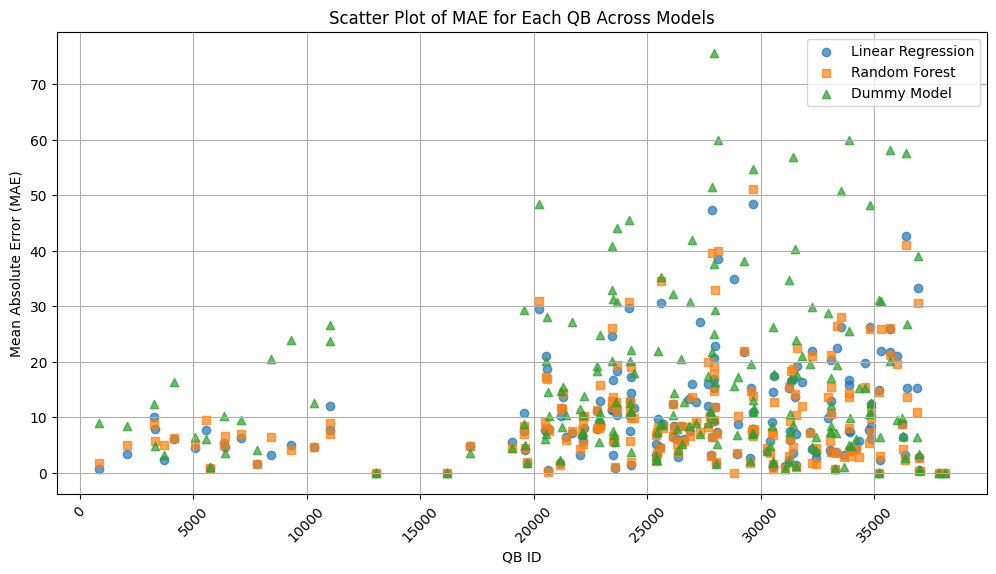

In [4]:
# Create a scatter plot for MAE comparison
plt.figure(figsize=(12, 6))

plt.scatter(mae_data["QB ID"], mae_data["Linear Regression"], label="Linear Regression", alpha=0.7, marker='o')
plt.scatter(mae_data["QB ID"], mae_data["Random Forest"], label="Random Forest", alpha=0.7, marker='s')
plt.scatter(mae_data["QB ID"], mae_data["Dummy Model"], label="Dummy Model", alpha=0.7, marker='^')

# Formatting
plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Scatter Plot of MAE for Each QB Across Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


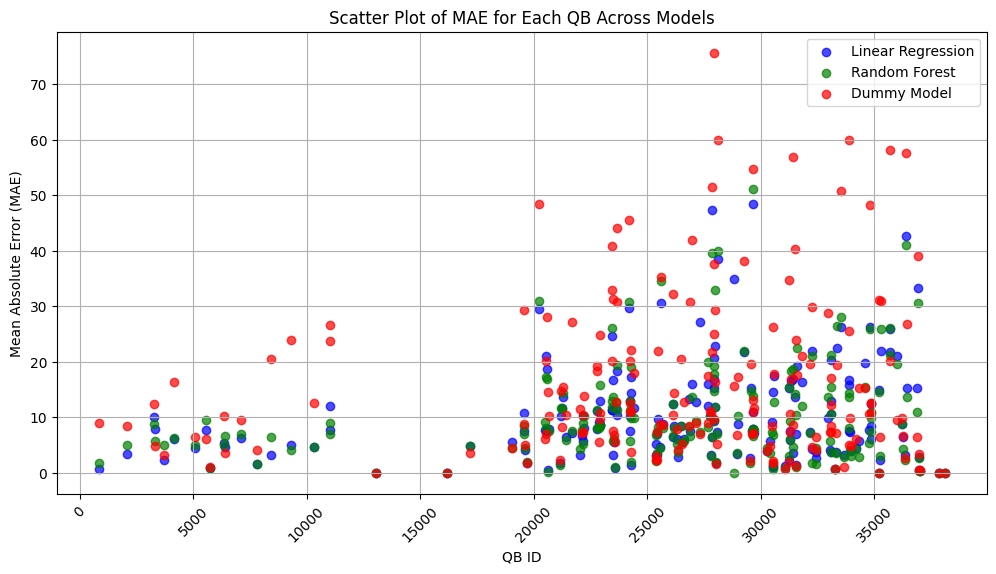

In [5]:
# Create a scatter plot for MAE comparison with different colors
plt.figure(figsize=(12, 6))

# Define colors for each model
colors = {"Linear Regression": "blue", "Random Forest": "green", "Dummy Model": "red"}

# Scatter plot with different colored dots
plt.scatter(mae_data["QB ID"], mae_data["Linear Regression"], color=colors["Linear Regression"], alpha=0.7, marker='o', label="Linear Regression")
plt.scatter(mae_data["QB ID"], mae_data["Random Forest"], color=colors["Random Forest"], alpha=0.7, marker='o', label="Random Forest")
plt.scatter(mae_data["QB ID"], mae_data["Dummy Model"], color=colors["Dummy Model"], alpha=0.7, marker='o', label="Dummy Model")

# Formatting
plt.xlabel("QB ID")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Scatter Plot of MAE for Each QB Across Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


<Figure size 1200x600 with 0 Axes>

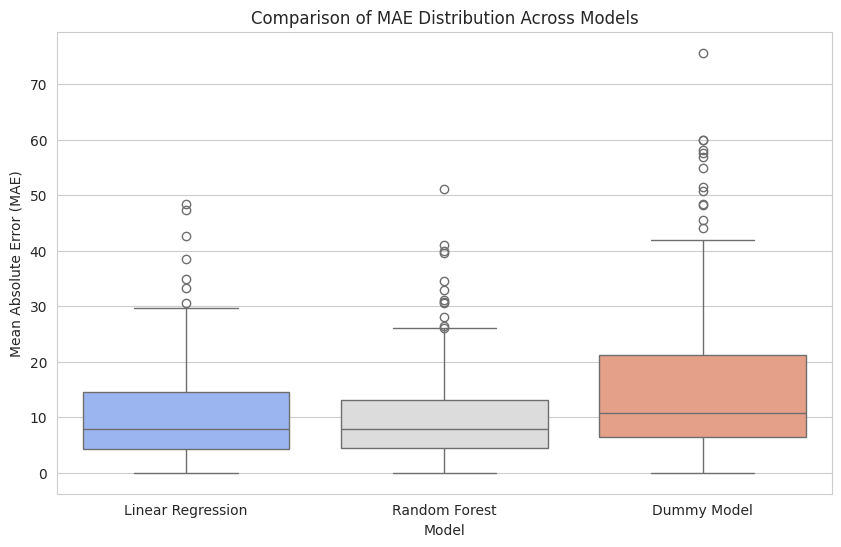

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Convert data to long format for seaborn
mae_long = mae_data.melt(id_vars=["QB ID"], var_name="Model", value_name="MAE")

# Create a boxplot to visualize the distribution of MAE across models (Fixed Version)
plt.figure(figsize=(10, 6))
sns.boxplot(data=mae_long, x="Model", y="MAE", hue="Model", palette="coolwarm")
#plt.legend().remove()  # Remove duplicate legend

# Labels and title
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Distribution Across Models")

plt.show()


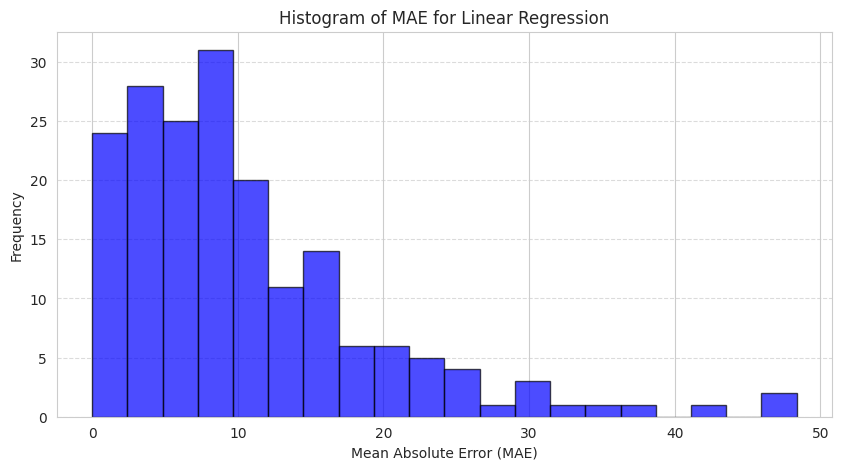

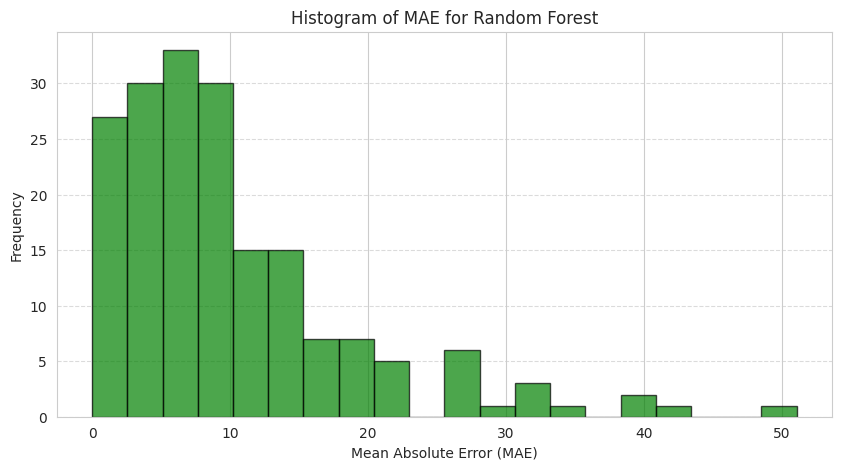

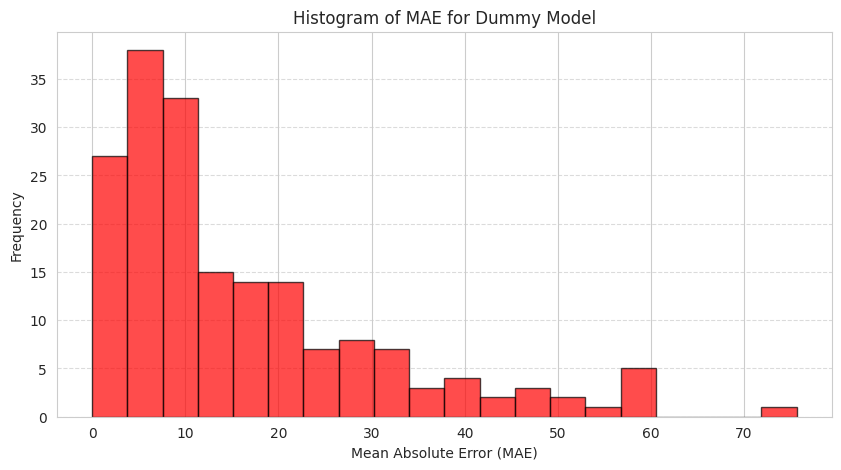

In [17]:
# Create individual histograms for each model

# Linear Regression MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Linear Regression"], bins=20, color='blue', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Linear Regression")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Random Forest MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Random Forest"], bins=20, color='green', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Random Forest")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Dummy Model MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Dummy Model"], bins=20, color='red', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Dummy Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


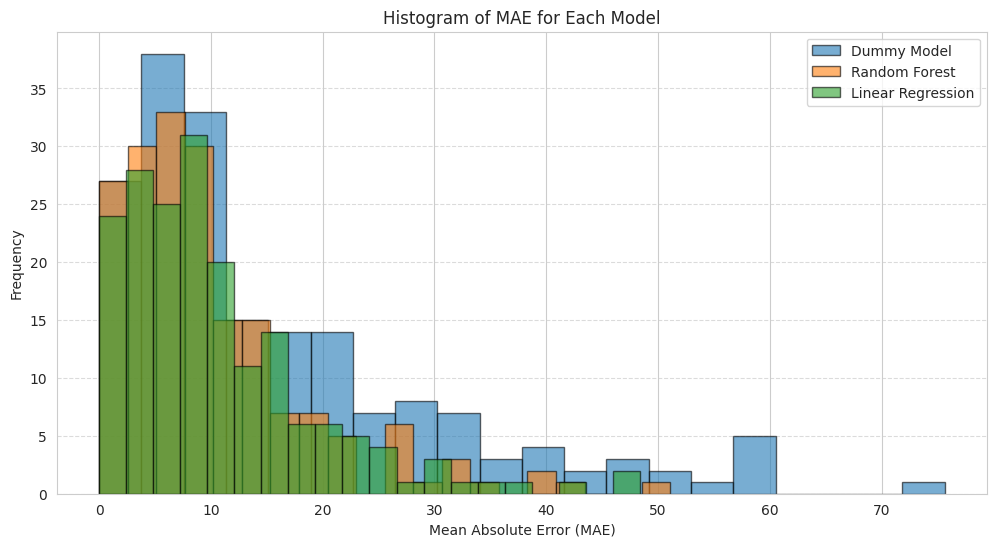

In [8]:
# Plot individual histograms for each model's MAE distribution
plt.figure(figsize=(12, 6))

# Histogram for each model separately
plt.hist(mae_data["Dummy Model"], bins=20, alpha=0.6, label="Dummy Model", edgecolor="black")
plt.hist(mae_data["Random Forest"], bins=20, alpha=0.6, label="Random Forest", edgecolor="black")
plt.hist(mae_data["Linear Regression"], bins=20, alpha=0.6, label="Linear Regression", edgecolor="black")

# Formatting
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Each Model")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


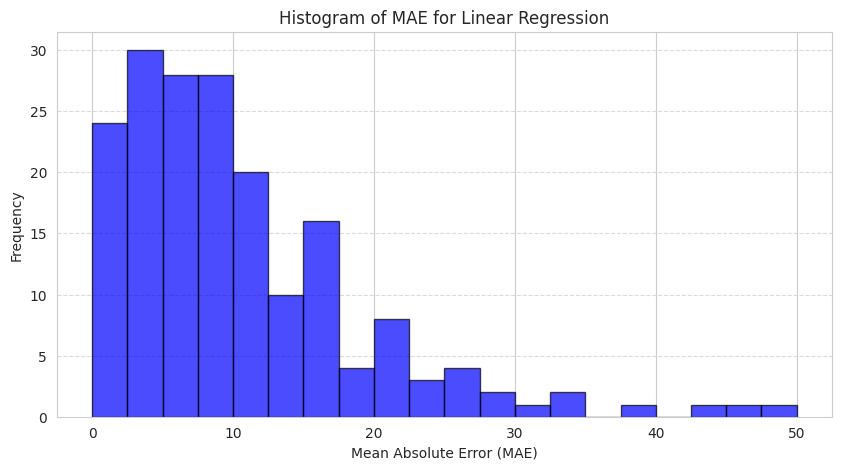

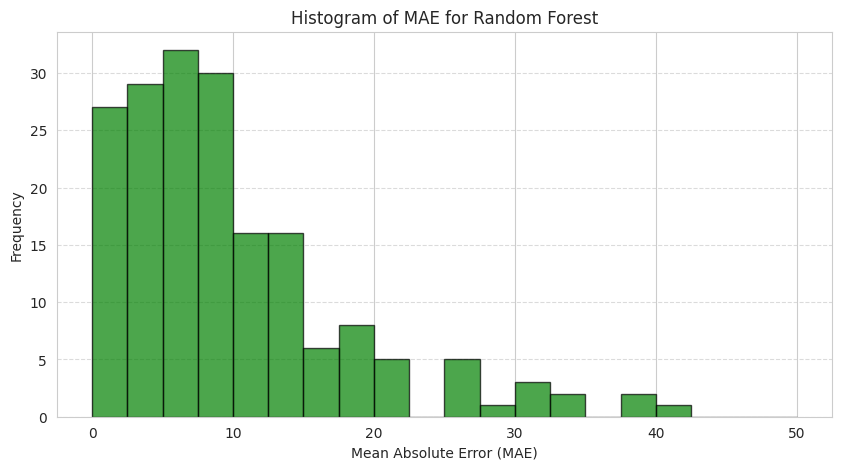

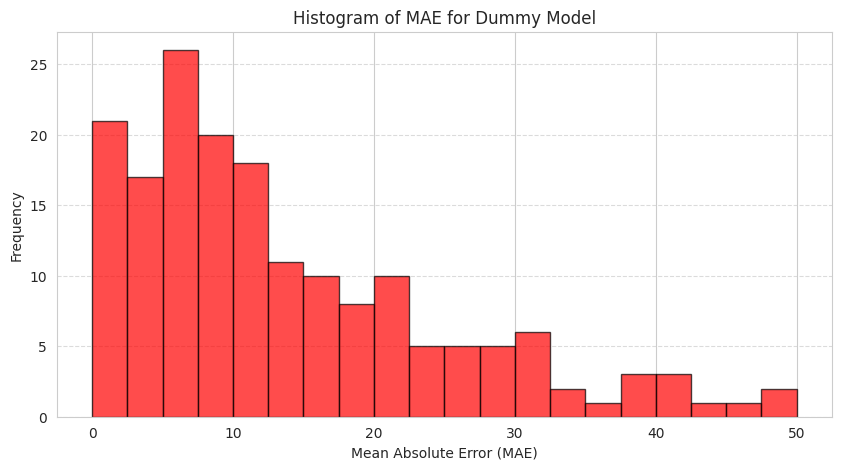

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mae_data' is your DataFrame with the MAE values for each model

# Define the bins based on the range you want to cover
bins = np.linspace(0, 50, 21)  # This creates 20 bins from 0 to 50

# Plot histograms for each model using the same bins
# Linear Regression MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Linear Regression"], bins=bins, color='blue', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Linear Regression")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Random Forest MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Random Forest"], bins=bins, color='green', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Random Forest")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Dummy Model MAE Histogram
plt.figure(figsize=(10, 5))
plt.hist(mae_data["Dummy Model"], bins=bins, color='red', alpha=0.7, edgecolor="black")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Histogram of MAE for Dummy Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



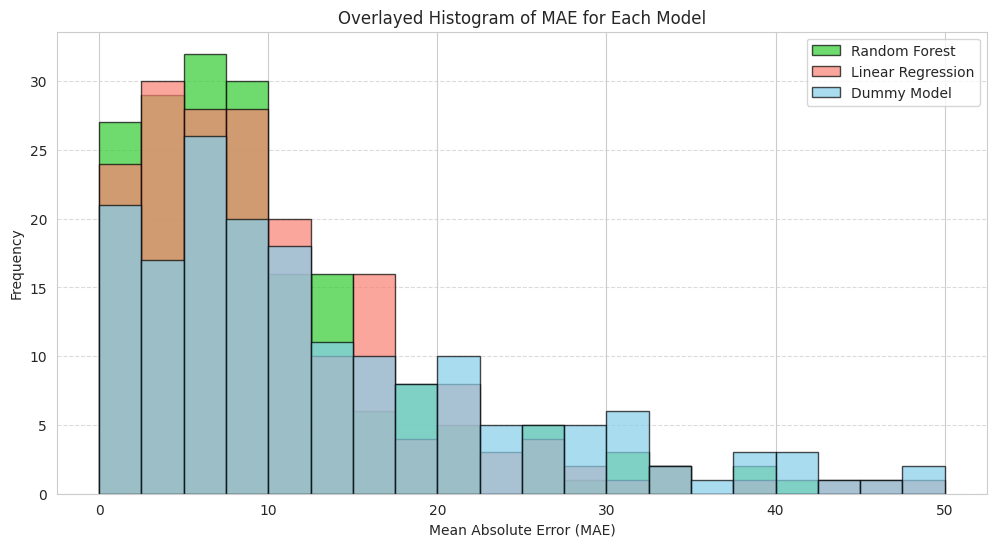

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mae_data' is your DataFrame with the MAE values for each model

# Define the bins based on the range you want to cover
bins = np.linspace(0, 50, 21)  # Adjust these values based on your data

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each histogram with the same alpha for uniform appearance
# Order of plotting affects which histogram appears on top; adjust as needed

plt.hist(mae_data["Random Forest"], bins=bins, color='limegreen', alpha=0.7, label="Random Forest", edgecolor="black")
plt.hist(mae_data["Linear Regression"], bins=bins, color='salmon', alpha=0.7, label="Linear Regression", edgecolor="black")
plt.hist(mae_data["Dummy Model"], bins=bins, color='skyblue', alpha=0.7, label="Dummy Model", edgecolor="black")
# Add labels and title
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Frequency")
plt.title("Overlayed Histogram of MAE for Each Model")

# Add legend to identify each model
plt.legend()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


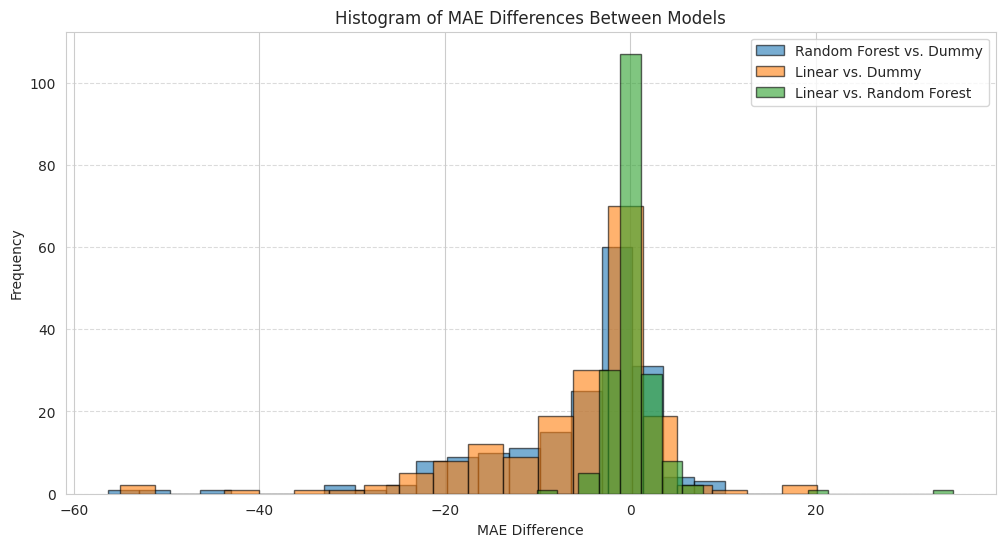

In [9]:
# Re-load the data after execution state reset

import pandas as pd

# File paths
file_paths = {
    "Linear Regression": "qb_results_with predictions_linear_regression.csv",
    "Random Forest": "qb_results_with_predictions_random_forrest.csv",
    "Dummy Model": "qb_dummy_model_results.csv",
}

# Load the data into dictionaries
dataframes = {model: pd.read_csv(path) for model, path in file_paths.items()}

# Extract QB IDs and MAE values
mae_data = pd.DataFrame({
    "QB ID": dataframes["Linear Regression"]["QB ID"],
    "Linear Regression": dataframes["Linear Regression"]["MAE"],
    "Random Forest": dataframes["Random Forest"]["MAE"],
    "Dummy Model": dataframes["Dummy Model"]["Mean Absolute Error"],
})

# Calculate differences between models
mae_diff = pd.DataFrame({
    "QB ID": mae_data["QB ID"],
    "Linear - Random Forest": mae_data["Linear Regression"] - mae_data["Random Forest"],
    "Linear - Dummy": mae_data["Linear Regression"] - mae_data["Dummy Model"],
    "Random Forest - Dummy": mae_data["Random Forest"] - mae_data["Dummy Model"],
})

# Set QB IDs as index for heatmap
mae_diff.set_index("QB ID", inplace=True)

# Generate heatmap
#import matplotlib.pyplot as plt
#import seaborn as sns

#plt.figure(figsize=(12, 6))
#sns.heatmap(mae_diff, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

#plt.xlabel("Model Pair")
#plt.ylabel("QB ID")
#plt.title("MAE Difference Heatmap Between Models")

#plt.show()





# Plot histograms of pairwise MAE differences
plt.figure(figsize=(12, 6))

# Flatten data for histogram visualization
plt.hist(mae_diff["Random Forest - Dummy"], bins=20, alpha=0.6, label="Random Forest vs. Dummy", edgecolor="black")
plt.hist(mae_diff["Linear - Dummy"], bins=20, alpha=0.6, label="Linear vs. Dummy", edgecolor="black")
plt.hist(mae_diff["Linear - Random Forest"], bins=20, alpha=0.6, label="Linear vs. Random Forest", edgecolor="black")


# Formatting
plt.xlabel("MAE Difference")
plt.ylabel("Frequency")
plt.title("Histogram of MAE Differences Between Models")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

